# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install -U scikit-learn==1.2.2 imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [3]:
df = pd.read_csv ('/kaggle/input/smoking-drinking-dataset/smoking_driking_dataset_Ver01.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [5]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [6]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [7]:
for col in df.columns:
    print(f"Distribusi setiap value pada kolom '{col}':")
    print(df[col].value_counts())
    print ("-" * 50)

Distribusi setiap value pada kolom 'sex':
sex
Male      526415
Female    464931
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'age':
age
40    130385
50    129434
45    118355
55    111223
60    106063
35     84726
30     77600
25     64370
65     52961
70     50666
75     25333
20     21971
80     14968
85      3291
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'height':
height
160    181809
165    178228
170    166328
155    165678
150    107929
175     98850
145     39176
180     35970
140      9100
185      6588
135      1241
190       363
130        86
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'weight':
weight
60     151134
55     150415
65     141241
50     125079
70     122281
75      90207
45      63047
80      58176
85      33708
90      18250
40      16639
95       9655
100    

In [8]:
print(df.duplicated().sum())
df = df.drop_duplicates()

26


DRK_YN
N    495844
Y    495476
Name: count, dtype: int64


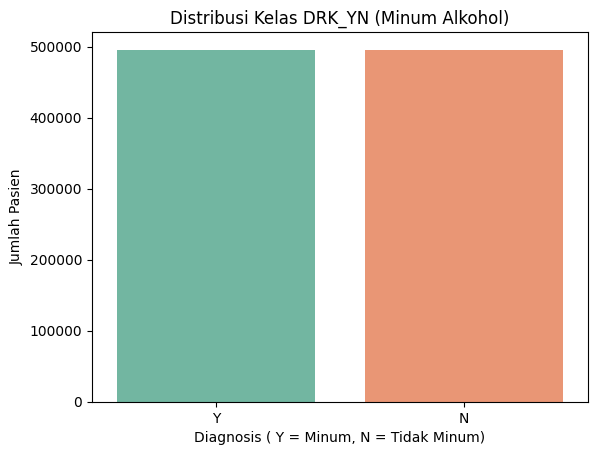

In [9]:
print(df['DRK_YN'].value_counts())

sns.countplot(x='DRK_YN', data=df, palette='Set2')
plt.title('Distribusi Kelas DRK_YN (Minum Alkohol)')
plt.xlabel('Diagnosis ( Y = Minum, N = Tidak Minum)')
plt.ylabel('Jumlah Pasien')
plt.show()

# Processing

In [10]:
df = df.copy()
df['DRK_YN'] = df['DRK_YN'].map({'N': 0, 'Y': 1})

In [11]:
X = df.drop(columns='DRK_YN') 
y = df['DRK_YN']

print("Fitur (X):", X.shape)
print("Target (y):", y.shape)

Fitur (X): (991320, 23)
Target (y): (991320,)


In [12]:
from sklearn.model_selection import train_test_split

# Split awal 80% (train+val) vs 20% (test)
X_temp, X_test, y_temp, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

# train (87.5%) dan val (12.5%) dari 80%
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp,test_size=0.125, random_state=42,stratify=y_temp)

In [13]:
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (693924, 23)
Validation: (99132, 23)
Test: (198264, 23)


In [14]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# kategorikal
for df_ in [X_train, X_val, X_test]:
    df_['sex'] = df_['sex'].map({'Male': 0, 'Female': 1})
    df_['hear_left'] = df_['hear_left'].astype(int)
    df_['hear_right'] = df_['hear_right'].astype(int)
    df_['SMK_stat_type_cd'] = df_['SMK_stat_type_cd'].astype(int)

# numerik di MinMaxScaler 
kolom_minmax = [
    'age', 'height', 'weight', 'waistline',
    'sight_left', 'sight_right',
    'SBP', 'DBP', 'BLDS',
    'tot_chole', 'HDL_chole', 'LDL_chole',
    'triglyceride', 'hemoglobin', 'serum_creatinine',
    'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'
]

scaler = MinMaxScaler()
X_train[kolom_minmax] = scaler.fit_transform(X_train[kolom_minmax])
X_val[kolom_minmax]   = scaler.transform(X_val[kolom_minmax])
X_test[kolom_minmax]  = scaler.transform(X_test[kolom_minmax])

In [15]:
import numpy as np

print("NaN check:\n", X_train.isna().sum())
print("Inf check:\n", np.isinf(X_train).sum())

NaN check:
 sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
dtype: int64
Inf check:
 sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT         

In [16]:
X_train.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
565920,1,0.076923,0.333333,0.260870,0.061554,0.091837,0.091837,1,1,0.197044,...,0.007399,0.024424,0.006534,0.504167,1.0,0.007150,0.002858,0.001942,0.013026,1
616392,1,0.076923,0.583333,0.173913,0.054490,0.112245,0.142857,1,1,0.177340,...,0.006043,0.019930,0.006850,0.520833,1.0,0.006129,0.002715,0.000694,0.013026,1
294123,0,0.461538,0.666667,0.521739,0.084561,0.112245,0.071429,1,1,0.251232,...,0.004193,0.019539,0.030035,0.612500,1.0,0.008172,0.003000,0.004023,0.030060,2
659006,1,0.461538,0.416667,0.173913,0.057013,0.091837,0.091837,1,1,0.113300,...,0.008509,0.020516,0.009274,0.420833,1.0,0.006129,0.003000,0.002774,0.017034,1
240093,1,0.846154,0.333333,0.434783,0.098890,0.040816,0.061224,1,1,0.310345,...,0.004440,0.018953,0.014227,0.525000,1.0,0.006129,0.002715,0.002636,0.013026,1


In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [18]:
# Sebelum SMOTE
print("Distribusi label sebelum SMOTE:")
print(y_train.value_counts())

# Sesudah SMOTE
print("\nDistribusi label sesudah SMOTE:")
print(y_train_bal.value_counts())

Distribusi label sebelum SMOTE:
DRK_YN
0    347091
1    346833
Name: count, dtype: int64

Distribusi label sesudah SMOTE:
DRK_YN
1    347091
0    347091
Name: count, dtype: int64


# Model

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Latih model di data train
model = RandomForestClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)

# Prediksi di test
y_test_pred = model.predict(X_test)
print("=== Evaluasi pada Test Set ===")
print(classification_report(y_test, y_test_pred))

=== Evaluasi pada Test Set ===
              precision    recall  f1-score   support

           0       0.73      0.73      0.73     99169
           1       0.73      0.74      0.73     99095

    accuracy                           0.73    198264
   macro avg       0.73      0.73      0.73    198264
weighted avg       0.73      0.73      0.73    198264



## Tabnet

In [20]:
pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [21]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import classification_report
import numpy as np

X_train_np = X_train_bal.to_numpy().astype('float32')
X_val_np = X_val.to_numpy().astype('float32')
X_test_np = X_test.to_numpy().astype('float32')

y_train_np = y_train_bal.to_numpy().astype('int64')
y_val_np = y_val.to_numpy().astype('int64')
y_test_np = y_test.to_numpy().astype('int64')

tabnet_model = TabNetClassifier(seed=42)

tabnet_model.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=30,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128
)

y_val_pred = tabnet_model.predict(X_val_np)
print("=== Evaluasi pada Validation Set ===")
print(classification_report(y_val_np, y_val_pred))

y_test_pred = tabnet_model.predict(X_test_np)
print("=== Evaluasi pada Test Set ===")
print(classification_report(y_test_np, y_test_pred))

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.55118 | val_accuracy: 0.7161  |  0:00:31s
epoch 1  | loss: 0.52635 | val_accuracy: 0.7305  |  0:01:00s
epoch 2  | loss: 0.5227  | val_accuracy: 0.73275 |  0:01:30s
epoch 3  | loss: 0.52138 | val_accuracy: 0.7339  |  0:02:00s
epoch 4  | loss: 0.5202  | val_accuracy: 0.73543 |  0:02:30s
epoch 5  | loss: 0.51961 | val_accuracy: 0.73688 |  0:02:59s
epoch 6  | loss: 0.51876 | val_accuracy: 0.73523 |  0:03:31s
epoch 7  | loss: 0.51784 | val_accuracy: 0.73785 |  0:04:03s
epoch 8  | loss: 0.51958 | val_accuracy: 0.73412 |  0:04:33s
epoch 9  | loss: 0.51896 | val_accuracy: 0.73328 |  0:05:02s
epoch 10 | loss: 0.51764 | val_accuracy: 0.73581 |  0:05:32s
epoch 11 | loss: 0.51735 | val_accuracy: 0.73442 |  0:06:02s
epoch 12 | loss: 0.51879 | val_accuracy: 0.73779 |  0:06:31s
epoch 13 | loss: 0.51729 | val_accuracy: 0.73506 |  0:07:00s
epoch 14 | loss: 0.51723 | val_accuracy: 0.73603 |  0:07:29s
epoch 15 | loss: 0.51765 | val_accuracy: 0.73744 |  0:07:58s
epoch 16 | loss: 0.51627

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


=== Evaluasi pada Validation Set ===
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     49584
           1       0.74      0.73      0.74     49548

    accuracy                           0.74     99132
   macro avg       0.74      0.74      0.74     99132
weighted avg       0.74      0.74      0.74     99132

=== Evaluasi pada Test Set ===
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     99169
           1       0.74      0.74      0.74     99095

    accuracy                           0.74    198264
   macro avg       0.74      0.74      0.74    198264
weighted avg       0.74      0.74      0.74    198264



## D1 CNN

In [22]:
X_train_bal = X_train_bal.to_numpy().astype('float32')
X_val       = X_val.to_numpy().astype('float32')
X_test      = X_test.to_numpy().astype('float32')

y_train_bal = y_train_bal.to_numpy().astype('float32')
y_val       = y_val.to_numpy().astype('float32')
y_test      = y_test.to_numpy().astype('float32')

In [23]:
X_train_cnn = X_train_bal.reshape(X_train_bal.shape[0], X_train_bal.shape[1], 1)
X_val_cnn   = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_cnn  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("X_train_cnn:", X_train_cnn.shape)
print("X_val_cnn:", X_val_cnn.shape)
print("X_test_cnn:", X_test_cnn.shape)

X_train_cnn: (694182, 23, 1)
X_val_cnn: (99132, 23, 1)
X_test_cnn: (198264, 23, 1)


In [24]:
pip install tensorflow==2.14

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.2
    Uninstalling google-auth-oauthlib-1.2.2:
      Successfully uninstalled google-auth-oauthlib-1.2.2
  Attempting uninstall:

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),

    Conv1D(filters=32, kernel_size=5, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.summary()

2025-07-26 09:42:37.245650: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-26 09:42:37.246425: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-26 09:42:37.246493: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 32)            192       
                                                                 
 batch_normalization (Batch  (None, 23, 32)            128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 23, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 23, 64)            6208      
                                                                 
 batch_normalization_1 (Bat  (None, 23, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 23, 64)            0

In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callback untuk early stopping jika val_loss tidak membaik
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Callback untuk menyimpan model terbaik berdasarkan val_loss
model_ckpt = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# Latih model dengan callback
history = model.fit(
    X_train_cnn, y_train_bal,
    validation_data=(X_val_cnn, y_val),
    epochs=25,
    batch_size=256,
    callbacks=[early_stop, model_ckpt],
    verbose=1
)

Epoch 1/25
2712/2712 [==============================] - ETA: 0s - loss: 0.5715 - accuracy: 0.7071 - auc: 0.7734
Epoch 1: val_loss improved from inf to 0.54858, saving model to best_model.h5
2712/2712 [==============================] - 94s 34ms/step - loss: 0.5715 - accuracy: 0.7071 - auc: 0.7734 - val_loss: 0.5486 - val_accuracy: 0.7164 - val_auc: 0.7963
Epoch 2/25
   5/2712 [..............................] - ETA: 1:24 - loss: 0.5621 - accuracy: 0.7148 - auc: 0.7853

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2711/2712 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7172 - auc: 0.7900
Epoch 2: val_loss improved from 0.54858 to 0.53592, saving model to best_model.h5
2712/2712 [==============================] - 89s 33ms/step - loss: 0.5543 - accuracy: 0.7172 - auc: 0.7900 - val_loss: 0.5359 - val_accuracy: 0.7248 - val_auc: 0.8049
Epoch 3/25
2711/2712 [============================>.] - ETA: 0s - loss: 0.5490 - accuracy: 0.7201 - auc: 0.7949
Epoch 3: val_loss improved from 0.53592 to 0.53314, saving model to best_model.h5
2712/2712 [==============================] - 85s 31ms/step - loss: 0.5490 - accuracy: 0.7201 - auc: 0.7949 - val_loss: 0.5331 - val_accuracy: 0.7262 - val_auc: 0.8087
Epoch 4/25
2712/2712 [==============================] - ETA: 0s - loss: 0.5458 - accuracy: 0.7220 - auc: 0.7977
Epoch 4: val_loss improved from 0.53314 to 0.52920, saving model to best_model.h5
2712/2712 [==============================] - 85s 31ms/step - loss: 0.5458 - accuracy: 0.7220 - 

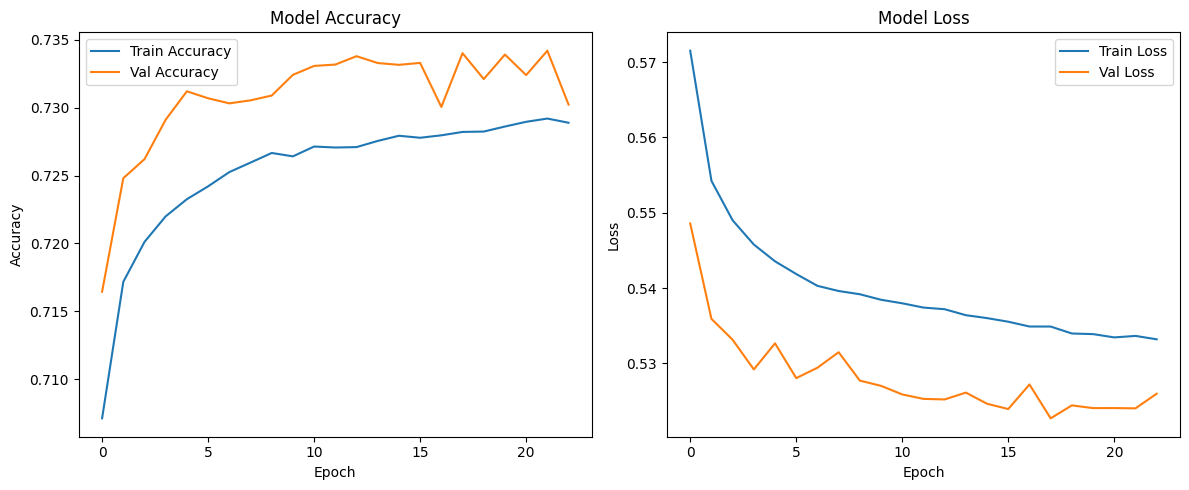

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

6196/6196 [==============================] - 13s 2ms/step


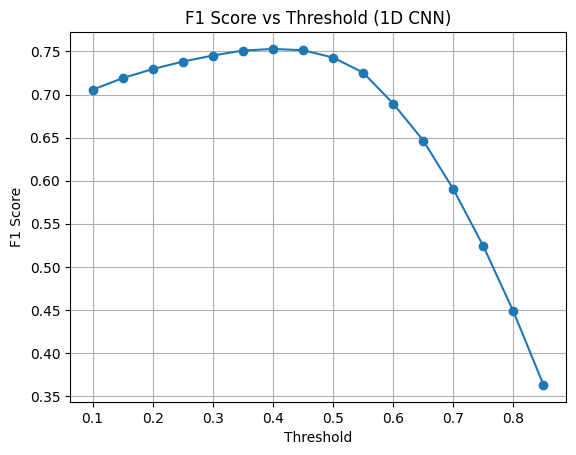

Best threshold: 0.40 (F1 score: 0.7529)

Classification Report with Tuned Threshold:
                    precision    recall  f1-score   support

 No HadHeartAttack       0.80      0.58      0.67     99169
Yes HadHeartAttack       0.67      0.86      0.75     99095

          accuracy                           0.72    198264
         macro avg       0.74      0.72      0.71    198264
      weighted avg       0.74      0.72      0.71    198264



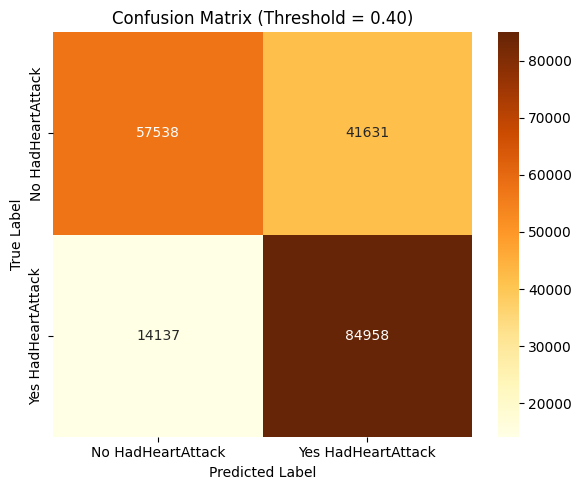

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

y_pred_prob = model.predict(X_test_cnn)

# threshold
thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = []

for t in thresholds:
    y_pred = (y_pred_prob > t).astype(int)
    score = f1_score(y_test, y_pred)
    f1_scores.append(score)

plt.plot(thresholds, f1_scores, marker='o')
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold (1D CNN)")
plt.grid()
plt.show()

# Ambil threshold terbaik
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best threshold: {best_threshold:.2f} (F1 score: {max(f1_scores):.4f})")

y_pred_final = (y_pred_prob > best_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_final)
labels = ['No HadHeartAttack', 'Yes HadHeartAttack']

print("\nClassification Report with Tuned Threshold:")
print(classification_report(y_test, y_pred_final, target_names=labels))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Threshold = {best_threshold:.2f})')
plt.tight_layout()
plt.show()

# Analisis Hasil

## 🧪 Evaluation Results (on Test Set)

| Model        | Accuracy | Precision (Drinker) | Recall (Drinker) | F1 Score (Drinker) |
|--------------|----------|----------------------|------------------|---------------------|
| **Random Forest** | 0.73     | 0.73                 | 0.74             | 0.73                |
| **TabNet**         | **0.74**     | **0.74**                 | 0.74             | 0.74                |
| **CNN 1D**         | 0.72     | 0.68                 | **0.85**         | **0.75**            |

---

## 📈 Insight & Analysis

- **TabNet** menunjukkan **kinerja paling seimbang** di seluruh metrik evaluasi, sedikit mengungguli Random Forest.
- **CNN 1D** sangat unggul dalam **recall**, yang berarti lebih mampu mendeteksi pelaku konsumsi alkohol — ideal jika ingin **meminimalkan false negative**.
-  **Random Forest** seimbang dan mudah diterapkan, tapi performanya sedikit di bawah TabNet.